In [1]:
# These are all the modules and definitions you will need in this notebook
import batman
from astropy.stats import BoxLeastSquares

import os
import matplotlib.pyplot as plt
plt.style.use("default")

from matplotlib import rcParams
rcParams["savefig.dpi"] = 75
rcParams["figure.dpi"] = 75
rcParams["font.size"] = 16
rcParams["text.usetex"] = False
rcParams["font.family"] = ["sans-serif"]
rcParams["font.sans-serif"] = ["cmss10"]
rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import logging
logger = logging.getLogger("theano.gof.compilelock")
logger.setLevel(logging.ERROR)
logger.propagate = False

import corner
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt

import pymc3 as pm
import exoplanet as xo
import theano.tensor as tt
# tt.config.optimizer='fast_compile'
# print(tt.config.optimizer)



#stuff for getting FFI data from MAST
import astropy
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy.wcs import WCS
from astropy.io import fits
import astropy.units as u

#in case there are WiFi issues, these may help
from urllib.error import HTTPError
import requests

#stuff for detecting periodic transit events
from transitleastsquares import catalog_info

import time as clock
import pandas as pd

import logging
logger = logging.getLogger("theano.gof.compilelock")
logger.setLevel(logging.ERROR)
logger.propagate = False

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
#import custom functions
# from MCMC_funcs import phasefold, build_model, build_model_sigma_clip,MCMC_planet_model
from MCMC_funcs2 import phasefold, build_model, build_model_sigma_clip,MCMC_planet_model
from MCMC_funcs2b import phasefold, build_model, build_model_sigma_clip,MCMC_planet_model
# from MCMC_funcs2c import phasefold, build_model, build_model_sigma_clip,MCMC_planet_model #doesn't work, flat fits

In [3]:
# #read in LC

# Sector=1
# saveLCpath='/Users/felizd/Desktop/TESS/TLS_Reports/Sector_'+str(Sector)+'/PLD_LCs/'
# ID=425998706

# qld, M_star, M_star_min, M_star_max, R_star, R_star_min, R_star_max = catalog_info(TIC_ID=ID)
# qld_a=qld[0]
# qld_b=qld[1]
# R_star_err=np.mean([R_star_min, R_star_max])




# LC_df = pd.read_csv(saveLCpath+'TIC_'+str(ID)+'_Sector_'+str(Sector)+'_PLD_LC.txt')
# T=np.array(LC_df['time'].to_list())
# F=np.array(LC_df['PLD detrended Flux'].to_list())#-1.0
# F_sap =np.array(LC_df['SAP Flux'].to_list())
# E=np.array(LC_df['flux error'].to_list())


# plt.plot(T,F,'k.')
# plt.ylim(0.98,1.02)
# plt.ylabel('Normalized Flux')
# plt.xlabel('TIME [TJD]')
# plt.show()





# #reading from candidates sheet
# T0s=[1327.189][0]
# Periods=[2.127][0] #days
# Depths=[1.458*1e-3][0] #*1e-3 #ppt to dex(?) conversion
# Duration=[0.519][0] #hours
# texp=np.mean(np.diff(T))

# ndays=np.round(T[-1]-T[0])

# Rad_sun = 6.955*10.0**10.0 #cm
# Rad_earth = 6.378*10.0**8.0 #cm
# Mass_Sun = 1.989*10.0**33.0 #grams

# logg=np.float64(4.8)
# logg_err=np.float64(0.003)
# R_star=np.float64(R_star*Rad_sun)
# R_star_err=np.float64(0.01)
# import random

# # TLS_P=np.float64(8.3910)
# TLS_P=np.random.uniform(1,ndays/3.0) #from 30 min to length of LC/3
# # TLS_TC=t[46]
# TLS_TC=random.choice(T)
# time_start =TLS_TC
# R_P=np.random.uniform(1.5,5) #mars to Super Earth sized


# print('Period: ',TLS_P)
# print('time start: ',TLS_TC)
# print('planet radius (RE): ',R_P)
# print('Stellar radius (RS): ',R_star/Rad_sun)

# # Use batman to create transits
# ma = batman.TransitParams()
# ma.t0 = time_start  # time of inferior conjunction; first transit is X days after start
# ma.per = TLS_P  # orbital period
# ma.rp = R_P*Rad_earth/(R_star)  # planet radius (in units of stellar radii) 
# ma.a = 10  # semi-major axis (in units of stellar radii)
# ma.inc = 90  # orbital inclination (in degrees)
# ma.ecc = 0  # eccentricity
# ma.w = 90  # longitude of periastron (in degrees)
# # qld_a=0.4; qld_b=0.4
# ma.u = [qld_a, qld_b]  # limb darkening coefficients
# ma.limb_dark = "quadratic"  # limb darkening model
# m = batman.TransitModel(ma, T,exp_time=texp)  # initializes model
# synthetic_signal = m.light_curve(ma)  # calculates light curve

# injectedflux = synthetic_signal- F+1

# plt.figure(figsize=(14,6)) #width, height
# plt.gca().get_xaxis().get_major_formatter().set_useOffset(False) #turns off scientific notation
# plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
# plt.plot(T,injectedflux,marker='.',color='black',linestyle='none')
# plt.plot(T,synthetic_signal,marker='.',color='red',linestyle='none')
# plt.xlabel("Time (JD)")
# plt.ylabel("Flux")
# plt.title("Transit Injected Fake Light Curve")
# plt.ylim(0.98,1.02)
# plt.show()



# T0s=[TLS_TC][0]
# Periods=[TLS_P][0]
# Depths=np.array([(R_P*Rad_earth/R_star)**2])[0] #*1e-3 #ppt to ppm conversion


# T = np.ascontiguousarray(T, dtype=np.float64)
# F = np.ascontiguousarray((injectedflux - 1.0) * 1e3, dtype=np.float64)
# E = np.ascontiguousarray(E * 1e3, dtype=np.float64)

# # F = np.ascontiguousarray(injectedflux-1.0, dtype=np.float64)
# # E = np.ascontiguousarray(E , dtype=np.float64)

# Depths=np.array([(R_P*Rad_earth/R_star)**2])[0]*1e3
# pf,ff = phasefold(T0s,T,Periods,F)
# plt.plot(pf,ff,'k.')
# # plt.axhline(y=1-Depths,color='green')
# plt.xlabel('phase')
# plt.ylabel('flux[ppt]')
# # plt.ylim(0.98-1,1.02-1)
# plt.title('Simulated planet')
# plt.show()

# plt.plot(pf,ff,'k.')
# # plt.axhline(y=1-Depths,color='green')
# plt.xlabel('phase')
# plt.ylabel('flux[ppt]')
# plt.xlim(-0.3,0.3)
# plt.title('Simulated planet')
# plt.show()

# df=pd.DataFrame({'time':T,'flux':F,"error":E})
# df.to_csv('SimulatedPlanet_LC.txt')

# sim_params=pd.DataFrame({'Period':Periods,'T0':T0s,'Depth':Depths},index=[0])
# sim_params.to_csv('SimulatedPlanet_params.txt')

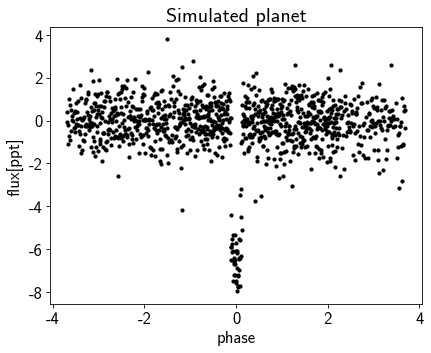

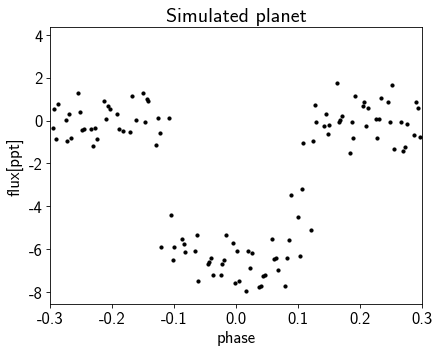

In [6]:
#Read in simulated planet data (instead of running cell above)

SimLC=pd.read_csv('SimulatedPlanet_LC.txt')
Sim_params=pd.read_csv('SimulatedPlanet_params.txt')

Periods=Sim_params['Period'].item()
T0s=Sim_params['T0'].item()
Depthss=Sim_params['Depth'].item()

T=np.array(SimLC['time'].to_list())
F=np.array(SimLC['flux'].to_list())
E=np.array(SimLC['error'].to_list())


pf,ff = phasefold(T0s,T,Periods,F)
plt.plot(pf,ff,'k.')
# plt.axhline(y=1-Depths,color='green')
plt.xlabel('phase')
plt.ylabel('flux[ppt]')
# plt.ylim(0.98-1,1.02-1)
plt.title('Simulated planet')
plt.show()

plt.plot(pf,ff,'k.')
# plt.axhline(y=1-Depths,color='green')
plt.xlabel('phase')
plt.ylabel('flux[ppt]')
plt.xlim(-0.3,0.3)
plt.title('Simulated planet')
plt.show()


#borrowing stellar params from real star
Sector=1
saveLCpath='/Users/felizd/Desktop/TESS/TLS_Reports/Sector_'+str(Sector)+'/PLD_LCs/'
ID=425998706

qld, M_star, M_star_min, M_star_max, R_star, R_star_min, R_star_max = catalog_info(TIC_ID=ID)
qld_a=qld[0]
qld_b=qld[1]
R_star_err=np.mean([R_star_min, R_star_max])

logg=np.float64(4.8)
logg_err=np.float64(0.003)


Rad_sun = 6.955*10.0**10.0 #cm
Rad_earth = 6.378*10.0**8.0 #cm
Mass_Sun = 1.989*10.0**33.0 #grams

In [7]:

#read in LC

Sector=1
saveLCpath='/Users/felizd/Desktop/TESS/TLS_Reports/Sector_'+str(Sector)+'/PLD_LCs/'
ID=425998706

qld, M_star, M_star_min, M_star_max, R_star, R_star_min, R_star_max = catalog_info(TIC_ID=ID)
qld_a=qld[0]
qld_b=qld[1]
R_star_err=np.mean([R_star_min, R_star_max])

logg=np.float64(4.8)
logg_err=np.float64(0.003)
R_star=np.float64(R_star*Rad_sun)
R_star_err=np.float64(0.01)

print(R_star)
# print(R_P*Rad_earth/R_star)
# print(ma.rp)
# print(ma.a)
# print(ma.t0)
# print(ma.per)

27528237750.0


In [8]:
#Read in results from above

LC=pd.read_csv('SimulatedPlanet_LC.txt')

T=np.array(LC['time'].to_list())
F=np.array(LC['flux'].to_list())
E=np.array(LC['error'].to_list())
print(len(F))
#nancheck
nanmask = np.where(np.isnan(F)==False)[0]
print(len(nanmask))
T=T[nanmask]
F=F[nanmask]
E=E[nanmask]
print(len(F))

1087
1087
1087


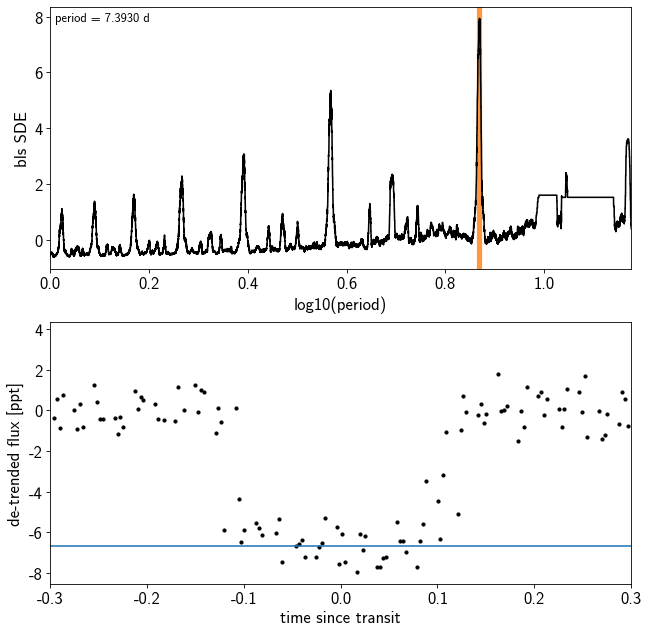

In [9]:
#get "prior" from BLS (quicker than TLS)

period_grid = np.exp(np.linspace(np.log(1), np.log(15), 50000))

bls = BoxLeastSquares(T, F)
bls_power = bls.power(period_grid, 0.1, oversample=20)

# Save the highest peak as the planet candidate
index = np.argmax(bls_power.power)
bls_period = bls_power.period[index]
bls_t0 = bls_power.transit_time[index]
bls_depth = bls_power.depth[index]
bls_dur  = bls_power.duration[index]
transit_mask = bls.transit_mask(T, bls_period, 0.2, bls_t0)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the periodogram
ax = axes[0]
ax.axvline(np.log10(bls_period), color="C1", lw=5, alpha=0.8)
ax.plot(np.log10(bls_power.period), (bls_power.power-np.median(bls_power.power))/np.std(bls_power.power), "k")
ax.annotate(
    "period = {0:.4f} d".format(bls_period),
    (0, 1),
    xycoords="axes fraction",
    xytext=(5, -5),
    textcoords="offset points",
    va="top",
    ha="left",
    fontsize=12,
)
ax.set_ylabel("bls SDE")
# ax.set_yticks([])
ax.set_xlim(np.log10(period_grid.min()), np.log10(period_grid.max()))
ax.set_xlabel("log10(period)")

# Plot the folded transit
ax = axes[1]
pfbls,ffbls=phasefold(bls_t0,T,bls_period,F)
ax.plot(pfbls,ffbls, ".k")
ax.axhline(y=-bls_depth)
ax.set_ylabel("de-trended flux [ppt]")
ax.set_xlabel("time since transit")
ax.set_xlim(-3*bls_dur,3*bls_dur)
plt.show()

In [10]:
#reading from candidates sheet
T0s=bls_t0
Periods=bls_period
Depths=bls_depth
Durations=bls_dur
texp=np.nanmedian(np.diff(T))

df=pd.DataFrame({'time':T,'flux':F,"error":E})
df.to_csv('SimulatedPlanet_LC.txt')

params=pd.DataFrame({'T0':float(T0s),'Period':float(Periods),'Depth':float(Depths)}, index=[0])

from transitleastsquares import catalog_info
ID = int(425998706)
qld, R_star, R_star_min, R_star_max, M_star, M_star_min, M_star_max = catalog_info(TIC_ID=ID)
qld_a = qld[0]
qld_b = qld[1]
R_star_err = R_star_max
M_star_err = M_star_max
# texp = np.median(np.diff(T))
# print(texp)
logg =  4.83052
logg_err = 0.00328087


params=pd.DataFrame({'Period':Periods,'T0':T0s,'Depth':Depths,'Duration':Durations,\
                     "R_star":R_star,"R_star_err":R_star_err,"M_star":M_star,"M_star_err":M_star_err,\
                     "logg":logg,'logg_err':logg_err,\
                    'qld_a':qld[0], 'qld_b':qld[1]},index=[0])
params.to_csv('SimulatedPlanet_params.txt')
params

,Period,T0,Depth,Duration,R_star,R_star_err,M_star,M_star_err,logg,logg_err,qld_a,qld_b
0,7.39298,1328.787573,6.678041,0.1,0.386736,0.020355,0.395805,0.011917,4.83052,0.003281,0.1604,0.4325


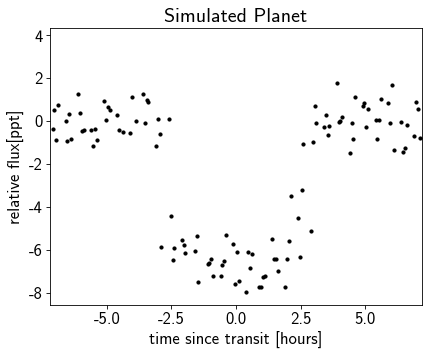

In [12]:
#Read in results from above

LC=pd.read_csv('SimulatedPlanet_LC.txt')

T=np.array(LC['time'].to_list())
F=np.array(LC['flux'].to_list())
E=np.array(LC['error'].to_list())

params=pd.read_csv('SimulatedPlanet_params.txt')
Periods=params['Period'].item()
T0s=params['T0'].item()
Depths=params['Depth'].item()
R_star=params["R_star"].item()
R_star_err=params["R_star_err"].item()
logg=params["logg"].item()
logg_err=params['logg_err'].item()
qld_a=params['qld_a'].item()
qld_b=params['qld_b'].item()


phase_fold,phase_fold_flux = phasefold(T0s,T,Periods,F)
plt.title('Simulated Planet')
plt.plot(24*phase_fold,phase_fold_flux,'k.')
plt.xlabel("time since transit [hours]")
plt.ylabel("relative flux[ppt]");
plt.xlim(-3*24*Durations,3*24*Durations)
plt.show()


In [13]:
#define some constants
RE = 6.378 * 10**8  #cm
RS = 6.955 * 10**10 #cm

In [14]:
print(M_star, M_star_err, R_star, R_star_err)

0.395805 0.0119175 0.386736 0.020355500000000002


*** Sigma clipping round 1 ***


optimizing logp for variables: [mean, logw0, logSw4, logs2]
55it [00:03, 14.58it/s, logp=nan] 
message: Desired error not necessarily achieved due to precision loss.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [logr]
2it [00:01,  1.96it/s, logp=nan] 
message: NaN result encountered.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [rb]
9it [00:01,  7.32it/s, logp=nan] 
message: Desired error not necessarily achieved due to precision loss.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [t0, logP]
113it [00:02, 52.93it/s, logp=nan] 
message: Desired error not necessarily achieved due to precision loss.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that somet

*** Sigma clipping round 2 ***


optimizing logp for variables: [mean, logw0, logSw4, logs2]
55it [00:01, 33.49it/s, logp=nan]
message: Desired error not necessarily achieved due to precision loss.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [logr]
2it [00:01,  1.75it/s, logp=nan] 
message: NaN result encountered.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [rb]
9it [00:02,  4.19it/s, logp=nan] 
message: Desired error not necessarily achieved due to precision loss.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model
optimizing logp for variables: [t0, logP]
113it [00:02, 41.06it/s, logp=nan] 
message: Desired error not necessarily achieved due to precision loss.
logp: nan -> nan
final logp not finite, returning initial point
this suggests that someth

plotting initial guesses
 


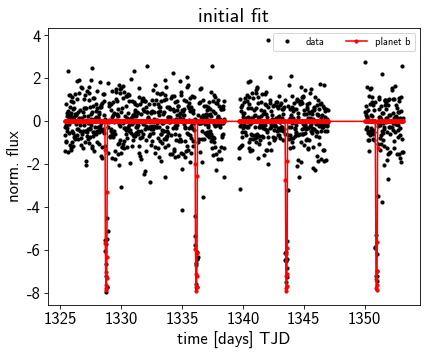

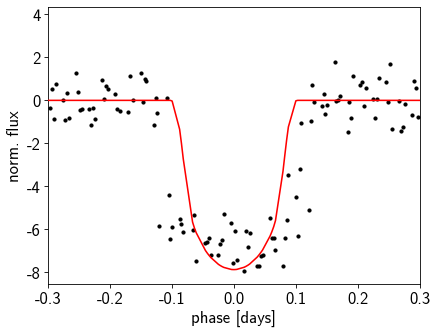

In [15]:
#doing this manually
MCMCfigpath=os.getcwd()+'/MCMC_figures/'
if os.path.exists(MCMCfigpath)==True:
#         print('folder exists, moving on...') #feel free to uncomment these out
    pass
else:
#         print('making directory') 
    os.makedirs(MCMCfigpath)
    
model = build_model_sigma_clip(ID, Sector, T,F,E, logg, logg_err, M_star, M_star_err,\
                               R_star, R_star_err, qld_a, qld_b,Periods, T0s, Depths, \
                               sigma=5.0, maxiter=10)

print('plotting initial guesses')
print(' ')
#if multiple planets input
letters = "bcdefghijklmnopqrstuvwxyz"[:len([Periods])]
with model:
    mean = model.map_soln["mean"]
    light_curves = xo.utils.eval_in_model(model.light_curves, model.map_soln)

plt.plot(model.x, model.y - mean, "k.", label="data")
for n, l in enumerate(letters):

#     print(np.shape(light_curves[:,n]),np.shape(model.x))

    plt.plot(model.x, light_curves, "r.-",label="planet {0}".format(l), zorder=100-n)
    #plt.plot(model.x, synthetic_signal-1, 'r.',label="injected model", zorder=99-n)

plt.xlabel("time [days] TJD")
plt.ylabel("norm. flux")
plt.title("initial fit")
# plt.xlim(model.x.min(), model.x.max())
plt.legend(fontsize=10,ncol=3);
plt.savefig(MCMCfigpath+"TIC_"+str(ID)+"_Sector_"+str(Sector)+'_LC_intialguess.png')
plt.show()
plt.close()


t0_init=model.map_soln["t0"]
per_init=model.map_soln["period"]

x_fold_init,x_fold_init_f = phasefold(t0_init,model.x,per_init,model.y-mean)
modelpf,modelff=phasefold(t0_init,model.x,per_init,light_curves)

plt.plot(x_fold_init,x_fold_init_f,"k.", label="data")
plt.plot(modelpf,modelff, "r-",label="planet {0}".format(l), zorder=100-n)
#plt.plot(x_fold, synthetic_signal-1, 'r.',label="injected model", zorder=99-n)
plt.xlim(-3*Durations,3*Durations)
plt.xlabel('phase [days]')
plt.ylabel('norm. flux')
plt.savefig(MCMCfigpath+"TIC_"+str(ID)+"_Sector_"+str(Sector)+'_PFLC_intialguess.png')
plt.show()
# plt.close()

# PROBLEM: Log-likelihood function is NaN, specifically relating to the eccentricity and this mysterious ecc_logodd___ free variable. Learn more about this and see what you can change for improvement.

In [16]:
print(model.check_test_point())
print(' ')



mean                       -3.22
u_star_quadlimbdark__      -2.77
m_star_interval__       -4289.09
r_star_interval__       -1492.87
logP                        1.38
t0                         -0.92
logr                       -0.92
rb_radiusimpact__          -4.10
ecc_logodds__                NaN
omega_angle__              -0.50
logs2                      -3.22
logw0                      -3.22
logSw4                     -3.22
obs                     -8173.88
Name: Log-probability of test_point, dtype: float64
 


In [17]:
print('inital transit model params: ')
print(' ')



for key,value in model.map_soln.items(): #map_soln is a dictionary! 
    print(str(key)+': '  + str(value))
    print(' ')

inital transit model params: 
 
mean: 0.0
 
u_star_quadlimbdark__: [4.4408921e-16 0.0000000e+00]
 
m_star_interval__: 0.0
 
r_star_interval__: 0.0
 
logP: [2.00053086]
 
t0: 1328.7875732421876
 
logr: -3.454478309782618
 
rb_radiusimpact__: [[ 0.69064905]
 [-2.43152568]]
 
ecc_logodds__: -inf
 
omega_angle__: [0. 1.]
 
logs2: 0.8420539771577709
 
logw0: 0.0
 
logSw4: 0.8420539771577709
 
u_star: [0.70710678 0.        ]
 
m_star: 1.5
 
r_star: 1.5
 
period: [7.39297966]
 
rb: [[0.08171928]
 [0.5       ]]
 
r: [0.08171928]
 
b: [0.5]
 
r_pl: [0.12257892]
 
ecc: 0.0
 
omega: 0.0
 
light_curves: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
 
gp_pred: [-0.12940976 -0.12325606 -0.11685471 ... -0.13221502 -0.13625481
 -0.14012923]
 


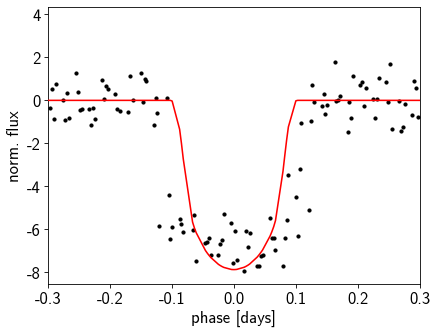

In [18]:

t0_init=model.map_soln["t0"]
per_init=model.map_soln["period"]

x_fold_init,x_fold_init_f = phasefold(t0_init,model.x,per_init,model.y-mean)
modelpf,modelff=phasefold(t0_init,model.x,per_init,light_curves)

plt.plot(x_fold_init,x_fold_init_f,"k.", label="data")
plt.plot(modelpf,modelff, "r-",label="planet {0}".format(l), zorder=100-n)
#plt.plot(x_fold, synthetic_signal-1, 'r.',label="injected model", zorder=99-n)
plt.xlim(-3*Durations,3*Durations)
plt.xlabel('phase [days]')
plt.ylabel('norm. flux')
plt.savefig(MCMCfigpath+"TIC_"+str(ID)+"_Sector_"+str(Sector)+'_PFLC_intialguess.png')
plt.show()
# plt.close()

In [19]:
print(per_init, Periods)

[7.39297966] 7.392979658930483


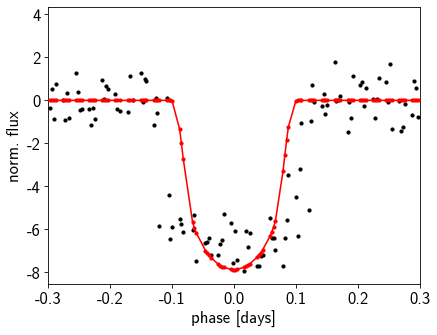

In [20]:


t0_init=model.map_soln["t0"]
per_init=model.map_soln["period"]
x_fold = (T - T0s + 0.5*Periods) % Periods - 0.5*Periods
x_fold_init = (model.x - t0_init + 0.5*per_init) % per_init - 0.5*per_init

x_fold_init,x_fold_init_f = phasefold(t0_init,model.x,per_init,model.y)
modelpf,modelff=phasefold(t0_init,model.x,per_init,light_curves)
plt.plot(x_fold_init,x_fold_init_f-mean,"k.", label="data")
plt.plot(modelpf,modelff, "r.-",label="planet {0}".format(l), zorder=100-n)
# plt.plot(x_fold, 1e3*(synthetic_signal-1), 'g.-',label="injected model", zorder=99-n)
plt.xlim(-3*Durations,3*Durations)
plt.xlabel('phase [days]')
plt.ylabel('norm. flux')
plt.show()
# plt.close()

In [ ]:
#Try it out
print('starting')
import time as clock
start = clock.time()

MCMCfigpath=os.getcwd()+'/MCMC_figures/'


ID=123456789
Sector=1
model,trace = MCMC_planet_model(ID, Sector, T,F,E, qld_a, qld_b, logg, logg_err, M_star, M_star_err,R_star, R_star_err, Periods, T0s, Depths, MCMCfigpath)

end = clock.time()
print('runtime: '+str ( (end-start)/60.0 )+' minutes')

starting
*** Sigma clipping round 1 ***


# NOTE: If log-likelihood is NaN or inf, you will get a "Bad initial energy" error stating that your model is bad in some way

In [ ]:
with model:
    #     light_curves = np.empty((500, len(model.x), len(Periods)))
    #     light_curves = np.empty((500, len(model.x), 2))
        light_curves = np.empty((500, len(model.x)))#, 1))

        func = xo.utils.get_theano_function_for_var(model.light_curves)
        for i, sample in enumerate(xo.utils.get_samples_from_trace(
                trace, size=len(light_curves))):
            light_curves[i] = func(*xo.utils.get_args_for_theano_function(sample))

In [ ]:
# b=model.light_curves.shape
# print(b)

b=(np.shape(model.light_curves.tag.test_value.flatten()))
c=(len(model.light_curves.tag.test_value.flatten()))
print(b,c)



In [ ]:
with model:
#     light_curves = np.empty((500, len(model.x), len(Periods)))
#     light_curves = np.empty((500, len(model.x), 2))
    light_curves = np.empty((500, len(model.x)))#, 1))
    
    func = xo.utils.get_theano_function_for_var(model.light_curves)
    for i, sample in enumerate(xo.utils.get_samples_from_trace(
            trace, size=len(light_curves))):
        light_curves[i] = func(*xo.utils.get_args_for_theano_function(sample))

for n, letter in enumerate(letters):
    plt.figure()

    # Compute the GP prediction
    mean_mod = 0#np.median(trace["mean"])#[:, None])

    # Get the posterior median orbital parameters
    p = np.median(trace["period"])##[:, n]) #<-too many indices
    t0 = np.median(trace["t0"])##[:, n])

    # Compute the median of posterior estimate of the contribution from
    # the other planet. Then we can remove this from the data to plot
    # just the planet we care about.

    inds = np.arange(0) != n
#     inds = np.arange(2) != n
#     inds = np.arange(1) != n
    others = np.median(np.sum(light_curves[:, inds], axis=-1), axis=0)
#         others = np.median(np.sum(light_curves, axis=-1), axis=0)

    # Plot the folded data
    x_fold = (model.x - t0 + 0.5*p) % p - 0.5*p
    plt.plot(x_fold, model.y - mean_mod - others, ".k", label="data", zorder=-1000)

    # Plot the folded model
    inds = np.argsort(x_fold)
    inds = inds[np.abs(x_fold)[inds] < 0.3]
#     pred = light_curves[:, inds, n]
    pred = light_curves[:, inds]#, 0]
    pred = np.percentile(pred, [16, 50, 84], axis=0)
    plt.plot(x_fold[inds], pred[1], color="C1", label="model")
    art = plt.fill_between(x_fold[inds], pred[0], pred[2], color="C1", alpha=0.5,
                           zorder=1000)
    art.set_edgecolor("none")

    # Annotate the plot with the planet's period
    txt = "period = {0:.4f} +/- {1:.4f} d ; TC = {2:.4f}".format(
        np.mean(trace["period"]), np.std(trace["period"]), np.mean(trace["t0"])-2457000)
    plt.annotate(txt, (0, 0), xycoords="axes fraction",
                 xytext=(5, 5), textcoords="offset points",
                 ha="left", va="bottom", fontsize=12)

    plt.legend(fontsize=10, loc='upper center',ncol=2)

    plt.xlabel("time since transit [Hrs]")
    plt.ylabel("relative flux")
    plt.title("TIC {0}-{1} ; Sector {2}".format(ID, letter, Sector));
    plt.xlim(-3*Durations,3*Durations)
    plt.savefig(MCMCfigpath+"TIC_"+str(ID)+"_Sector_"+str(Sector)+'_PFLC_finalguess.png',\
                bbox_inches='tight')
    plt.close()

RE = 6.378 * 10**8  #cm
RS = 6.955 * 10**10 #cm
print('True Period: ',Periods)
print('True time start: ',T0s)
print('True planet radius (RE): ', np.sqrt(1-(1-(Depths/1000)))*R_star*RS/RE) #converting ppt to ppo
print('True Stellar radius (RS): ',R_star)    

plt.plot(x_fold[inds], pred[1], "C1")
art = plt.fill_between(x_fold[inds], pred[0], pred[2], color="C1", alpha=0.5,
                       zorder=1000)
art.set_edgecolor("none")

plt.plot(x_fold, model.y - mean_mod - others, ".k", label="data", zorder=-1000)
#x_fold_synthetic=(T - TLS_TC + 0.5*TLS_P) % TLS_P - 0.5*TLS_P
#plt.plot(x_fold_synthetic,synthetic_signal-1,'r.')    
plt.xlim(-3*Durations,3*Durations)
#     plt.ylim(-0.005,0.005)
plt.xlabel('time since transit [Hrs]')
plt.ylabel('relative flux')
plt.savefig(MCMCfigpath+"TIC_"+str(ID)+"_Sector_"+str(Sector)+'_PFLC_finalguess_comparison.png'\
            ,bbox_inches='tight')
#     plt.show()
plt.close()

print('making posterior plots')
print('')

# Convert to Earth radii
r_pl = trace["r"]*R_star/RE  #rp/sun
samples = np.concatenate((r_pl, trace["b"]), axis=-1)

# labels = ["$R_{{\mathrm{{Pl}},{0}}}$ [$R_\oplus$]".format(i) for i in letters]
# labels += ["impact param {0}".format(i) for i in letters]

# corner.corner(samples, labels=labels, show_titles=True, title_kwargs=dict(fontsize=10));
# plt.show()

labels = ["$P_{{{0}}}$ [days]".format(i) for i in letters]
labels += ["$t0_{{{0}}} $ [TBJD]".format(i) for i in letters]
# labels += ["$R_{{\mathrm{{Pl}},{0}}}$ ".format(i) for i in letters]
labels += ["$R_{P}/R_{S}$ "]#.format(i) for i in letters]
labels += ["impact param {0}".format(i) for i in letters]

n=len(letters)
samples = pm.trace_to_dataframe(trace, varnames=["period", "t0","r","b"])
truth = np.concatenate(xo.eval_in_model([tt.as_tensor_variable([Periods]), tt.as_tensor_variable([T0s-2457000])], model.test_point, model=model))


ndim=4
value1= model.map_soln["mean"]
value2=np.mean(samples, axis=0)
# Make the base corner plot
figure = corner.corner(samples,labels=labels, quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs=dict(fontsize=10));

# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1, color="g")
    ax.axvline(value2[i], color="r")
# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value2[xi], color="r")
        ax.axhline(value2[yi], color="r")
        ax.plot(value2[xi], value2[yi], "sr")

figure.tight_layout()               
figure.savefig(MCMCfigpath+"TIC_"+str(ID)+"_Sector_"+str(Sector)+'_MCMC_posteriors.png',\
               bbox_inches='tight')
#     figure.show()
plt.close()

In [ ]:
print(R_star,logg)

In [ ]:
print('ok')

In [ ]:

#testing
periods = np.atleast_1d(Periods)[0]
t0s = np.atleast_1d(T0s)[0]
depths = np.atleast_1d(Depths)[0]
r_guess = np.sqrt(Depths) # R_Planet / R_Star

with pm.Model() as model:
    BoundedNormal = pm.Bound(pm.Normal, lower=0, upper=3)
    r_star = BoundedNormal("r_star", mu=R_star, sd=R_star_err)
    mean = pm.Normal("mean", mu=0.0, sd=1.0)
        
    logg_star = pm.Normal("logg_star", mu=logg, sd=logg_err)
#     r_star = pm.Bound(pm.Normal, lower=0.0)("r_star", mu=R_star, sd=R_star_err)
    rho_star = pm.Deterministic("rho_star", 10**logg / r_star)



    # The time of a reference transit for each planet
    t0 = pm.Normal("t0", mu=t0s, sd=1.0)#, shape=2)

    # The log period; also tracking the period itself
    #Problem?
    logP = pm.Normal("logP", mu=np.log(periods), sd=0.1)#, shape=2)
    period = pm.Deterministic("period", pm.math.exp(logP))

    # The Kipping (2013) parameterization for quadratic limb darkening paramters
    u = xo.distributions.QuadLimbDark("u", testval=np.array([qld_a,qld_b]))

    # The Espinoza (2018) parameterization for the joint radius ratio and
    # impact parameter distribution
    r, b = xo.distributions.get_joint_radius_impact(
        min_radius=r_guess-0.01, max_radius=r_guess+0.01, 
        testval_r=r_guess, testval_b=np.random.uniform(0,1))

    r_planet = pm.Deterministic("r_pl", r * R_star)


    # This shouldn't make a huge difference, but I like to put a uniform
    # prior on the *log* of the radius ratio instead of the value. This
    # can be implemented by adding a custom "potential" (log probability).
    pm.Potential("r_prior", -pm.math.log(r))

    # Set up a Keplerian orbit for the planets
    orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b,\
                                    r_star=r_star, rho_star=rho_star)
    
    trace = pm.sample(100)

In [ ]:
print(pm.trace)

In [ ]:
pm.traceplot(trace)

In [ ]:
_, ax = plt.subplots(figsize=(12, 6))
ax.hist([n.mean() for n in ppc['R_star']], bins=19, alpha=0.5)
ax.axvline(data.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [ ]:
print(type(model))

In [ ]:
samples = pm.trace_to_dataframe(model, varnames=["period", "t0","r","b"])